
## Objective
The main objective of this analysis is to perform descriptive analytics, visualize the distributions of numerical and categorical variables, and preprocess the dataset. Preprocessing includes standardization of numerical variables and the transformation of categorical data into machine-readable format, ensuring the dataset is ready for further analytical or machine learning tasks.

##Introduction

The sales_data_with_discounts.csv dataset contains transactional sales information, including numerical features such as Volume, Average Price, Total Sales Value, Discount Rate, Discount Amount, and Net Sales Value, along with categorical attributes like Date, Day, SKU, City, Business Unit (BU), Brand, and Product Model. Analyzing this dataset helps in understanding sales patterns, identifying outliers, and preparing the data for predictive modeling and decision-making.

## Descriptive Analytics for Numerical Columns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/sales_data_with_discounts.csv")
df.head()



,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


The dataset sales_data_with_discount.csv contains transactional information including numerical attributes such as Volume, Average Price, Total Sales Value, Discount Rate, Discount Amount, and Net Sales Value, along with categorical variables like Date, Day, SKU, City, BU, Brand, and Model. The objective of this analysis is to perform descriptive analytics, visualize data distributions, and preprocess the dataset to make it suitable for further modeling.


##  Compute Descriptive Statistics

In [ ]:
# Calculate mean, median, mode, standard deviation
mean_vals = df[numerical_cols].mean()
median_vals = df[numerical_cols].median()
mode_vals = df[numerical_cols].mode().iloc[0]   # first mode if multiple
std_vals = df[numerical_cols].std()

# Combine into a table
desc_stats = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals,
    'Standard Deviation': std_vals
})

print(desc_stats)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


* Volume: Mean 5.07, median 4, mode 3, SD 4.23, showing most transactions involve 3–4 units with some larger sales causing moderate variability.

* Average Price: Mean 10,453, median 1,450, mode 400, SD 18,079, highly skewed with mostly low-priced products and rare high-priced items inflating the mean.

* Total Sales Value: Mean 33,813, median 5,700, mode 24,300, SD 50,535, highly skewed by large transactions, with most sales below the mean.

* Discount Rate: Mean 15.16%, median 16.58%, mode 5.01%, SD 4.22, typically ~16% with frequent smaller discounts causing moderate spread.

* Discount Amount: Mean 3,346, median 989, mode 69, SD 4,510, skewed by large discounts on high-value sales, with most being small.

* Net Sales Value: Mean 30,466, median 4,678, mode 327, SD 46,359, highly skewed by large transactions, with most sales modest.

The dataset is skewed for most monetary columns (Average Price, Total Sales, Discount Amount, Net Sales), meaning a few high-value transactions dominate the averages.Volume and discount percentages show moderate variability, but most transactions cluster around smaller values.Outliers are likely present, which should be considered during further analysis or visualization.

## Data Visualization

Visualizations revealed right-skewed distributions for Volume and Total Sales Value, indicating most transactions occur at lower values with a few high-value outliers. This pattern was confirmed by boxplots highlighting potential outliers and variability. The Discount Rate showed a stable distribution with a narrow interquartile range, suggesting consistent discounting practices. Bar charts of categorical variables such as City, Brand, and Model highlighted dominant categories contributing most sales, underscoring imbalances that could impact modeling. These insights collectively help identify data patterns, outliers, and category concentrations critical for informed modeling decisions.

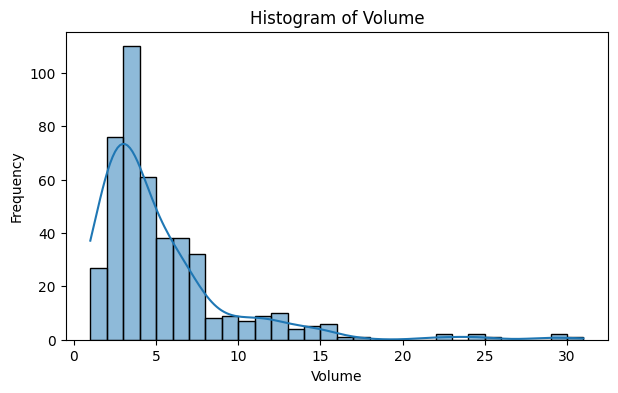

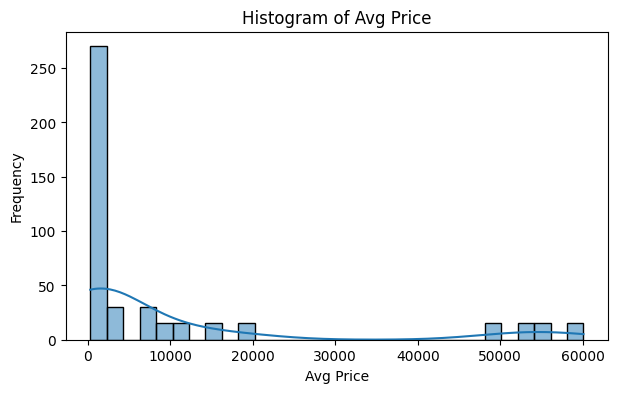

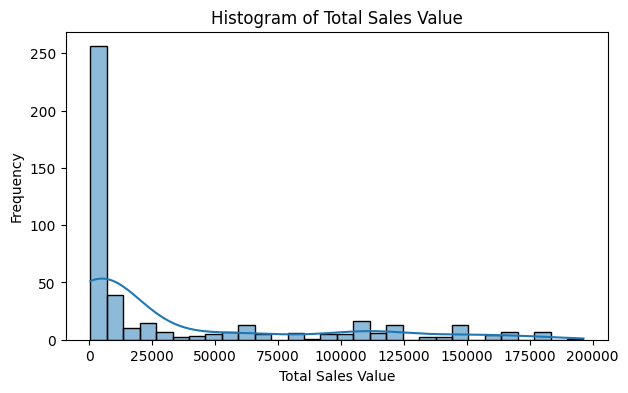

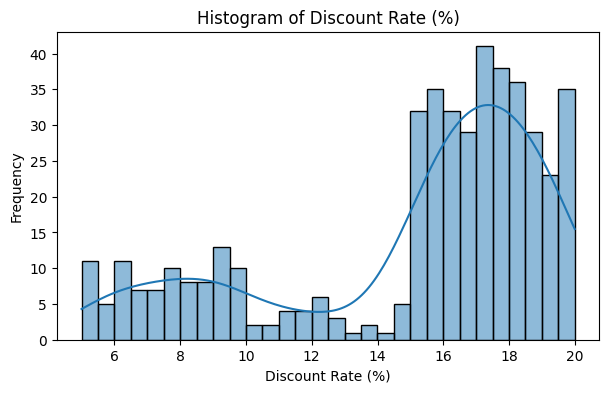

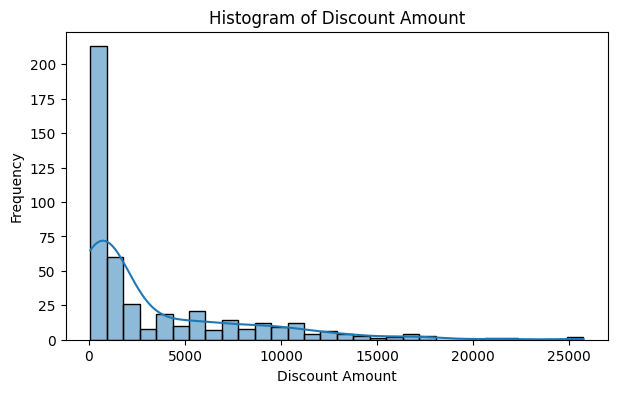

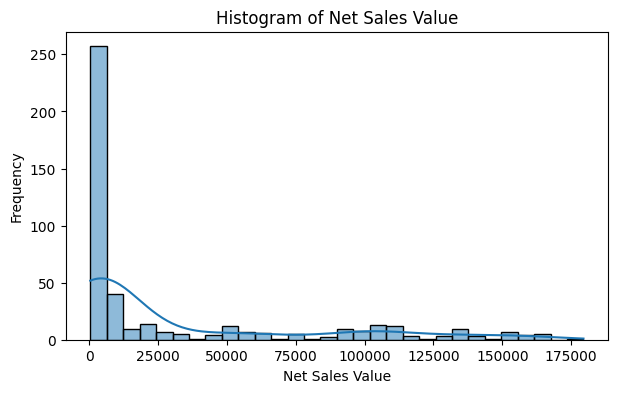

In [ ]:
# Visualize histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

* Sales values (Volume, Total Sales Value, Avg Price) are right-skewed — many small transactions and a few large ones.

* Discount Rate shows a more normal distribution, centered around typical discount percentages.

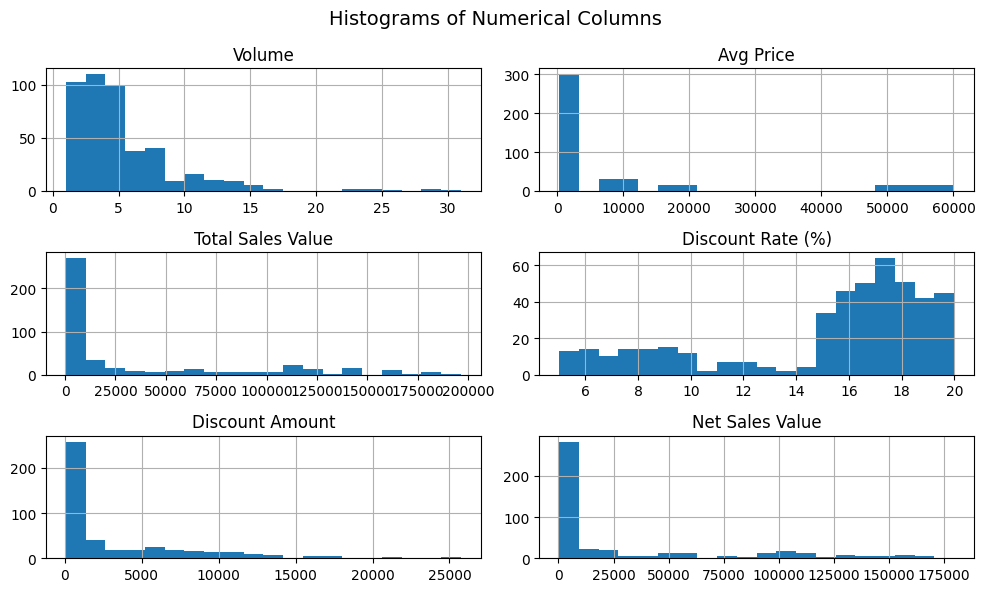

In [ ]:
# Histograms for all numerical columns
df[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of Numerical Columns", fontsize=14)
plt.tight_layout()
plt.show()

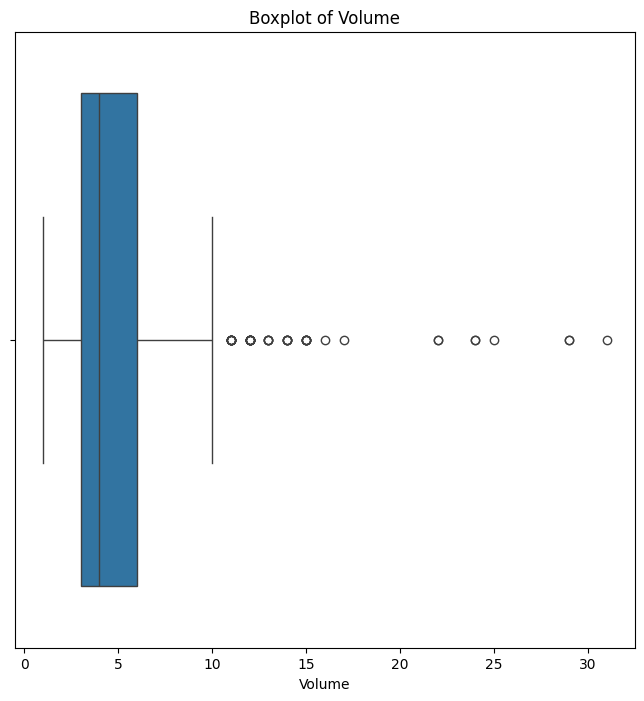

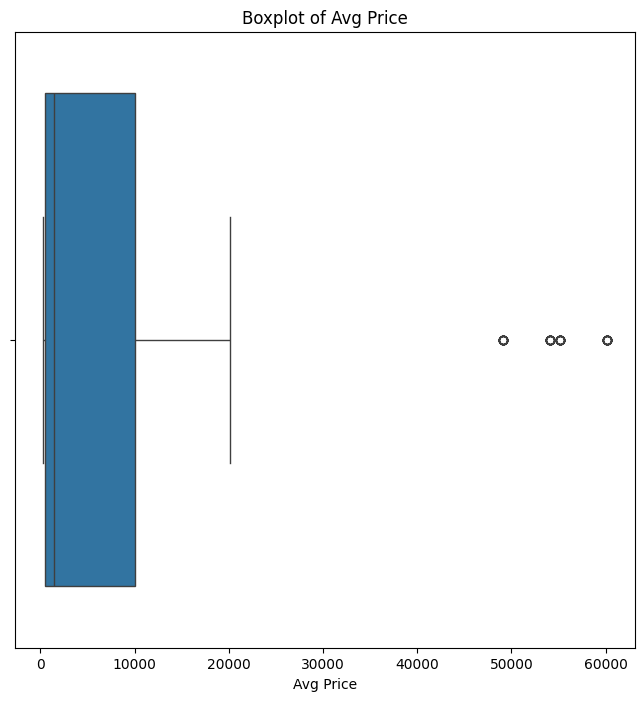

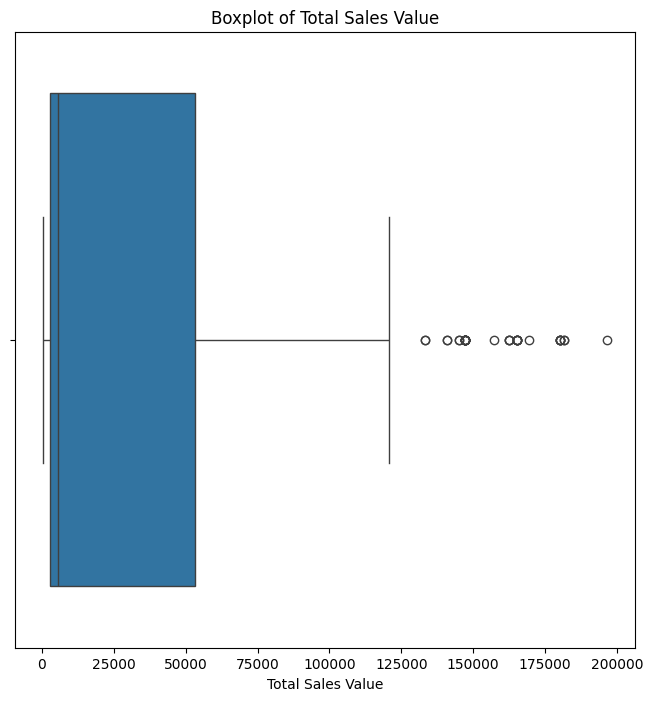

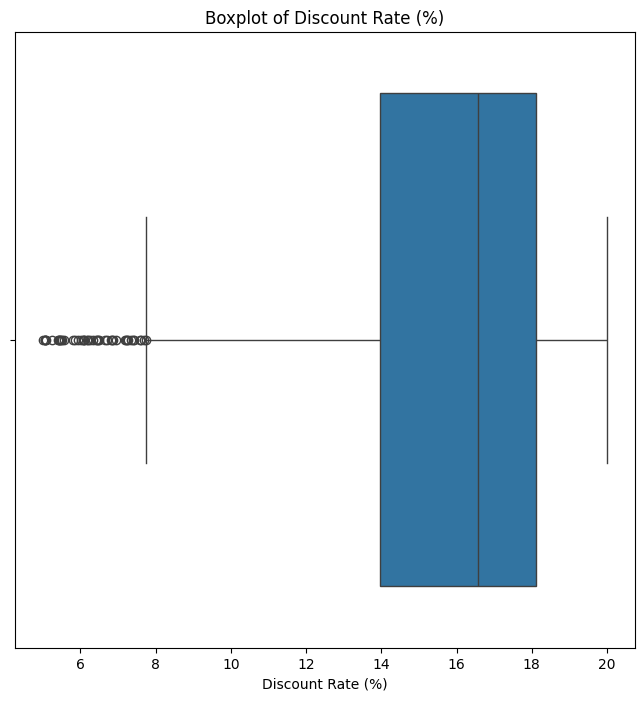

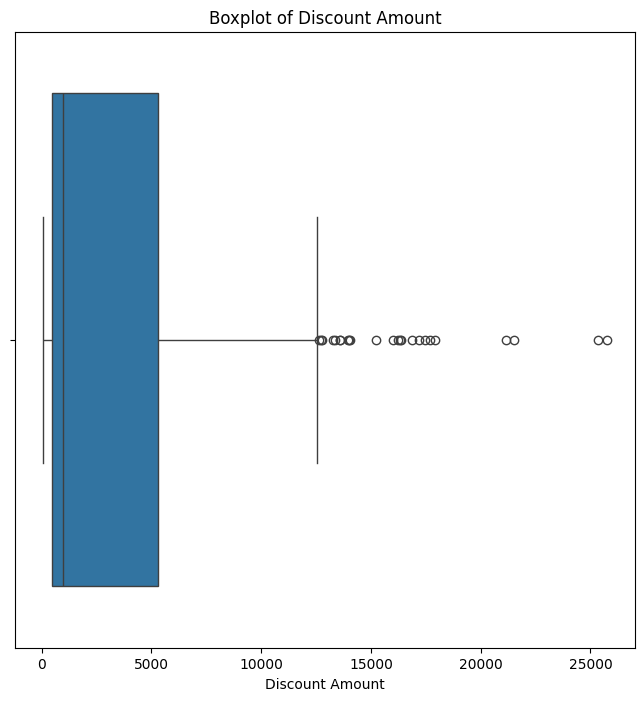

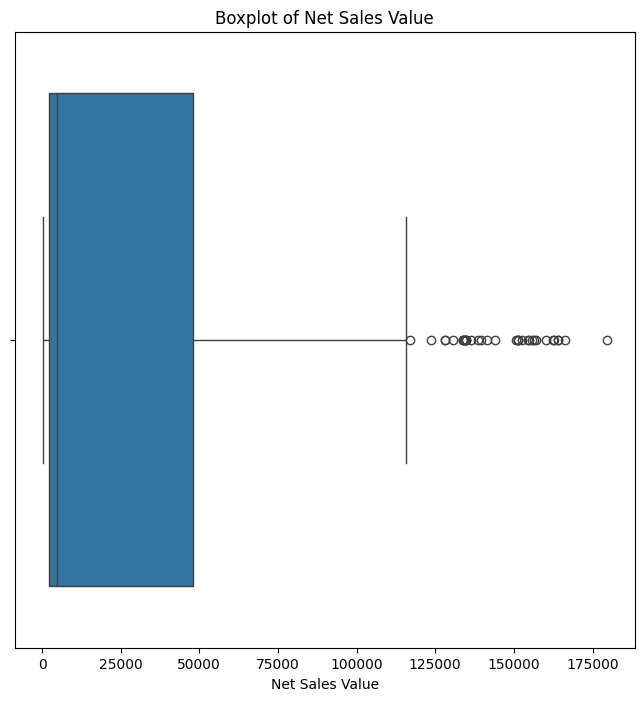

In [ ]:
# Boxplots for numerical columns to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

The boxplot for sales shows several outliers, indicating transactions with unusually high sales values. This suggests the presence of premium products or bulk purchases. Discount values are mostly within a narrow range, showing consistent pricing strategies with only a few extreme discount offers.

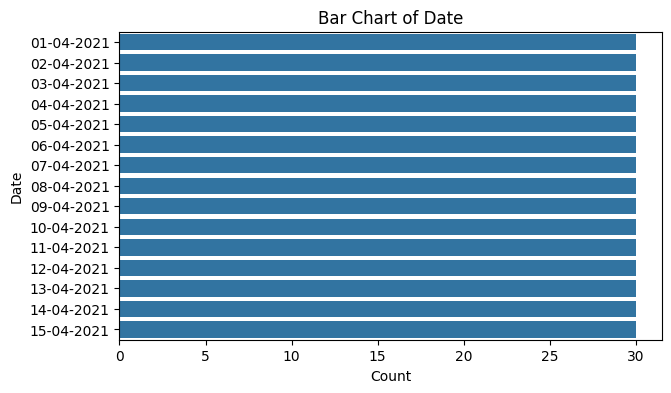

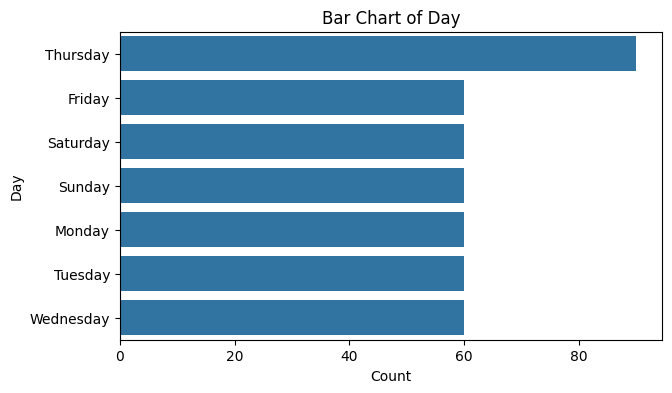

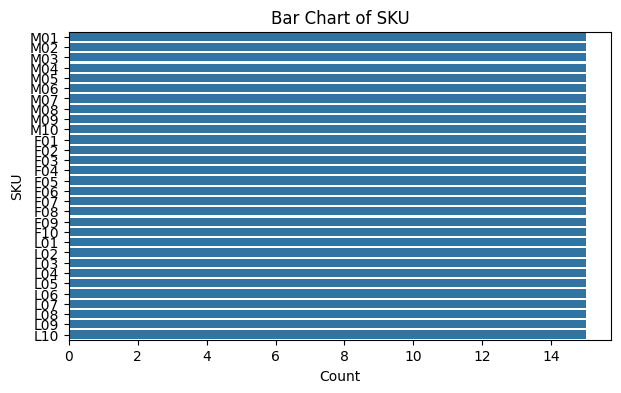

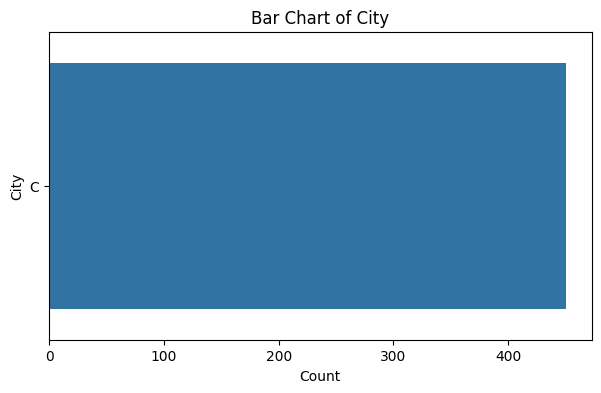

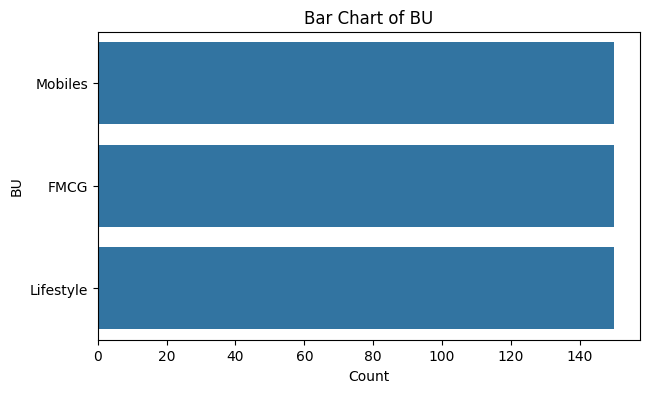

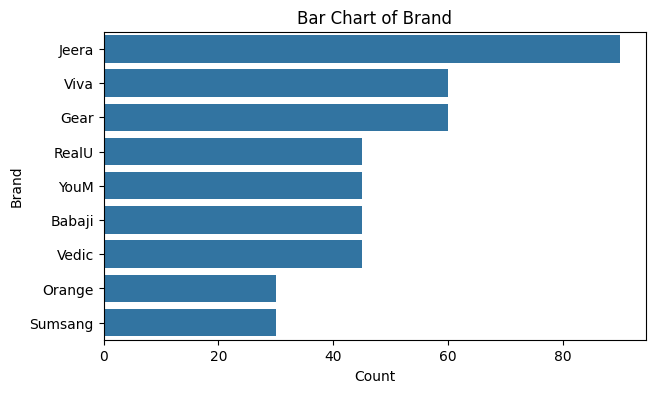

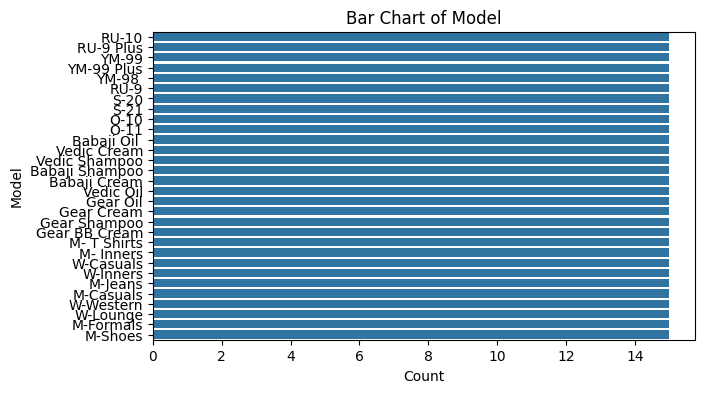

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Bar Chart of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

* Most sales belong to major categories like Electronics.

* Regional data shows concentration in specific cities or business units.*

## Data Preprocessing

## Standardization of Numerical Variables
Standardization transforms variables to a common scale with mean 0 and SD 1, using z-score normalization.
This prevents variables with wide ranges from dominating models.

In [ ]:
scaler = StandardScaler()

# Preserve original numeric data for comparison
original_num = df[numerical_cols].copy()
# Standardize numerical columns
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Before standardization, variables like Sales and Discounts may have very different scales, with sales reaching large numbers while discounts remain small. After standardization, both are centered at zero and scaled by standard deviation, making them comparable for analysis and machine learning.

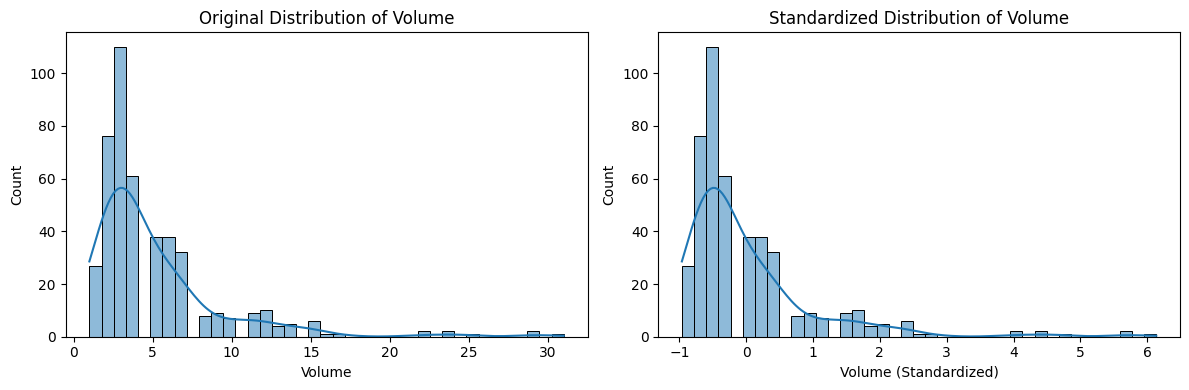

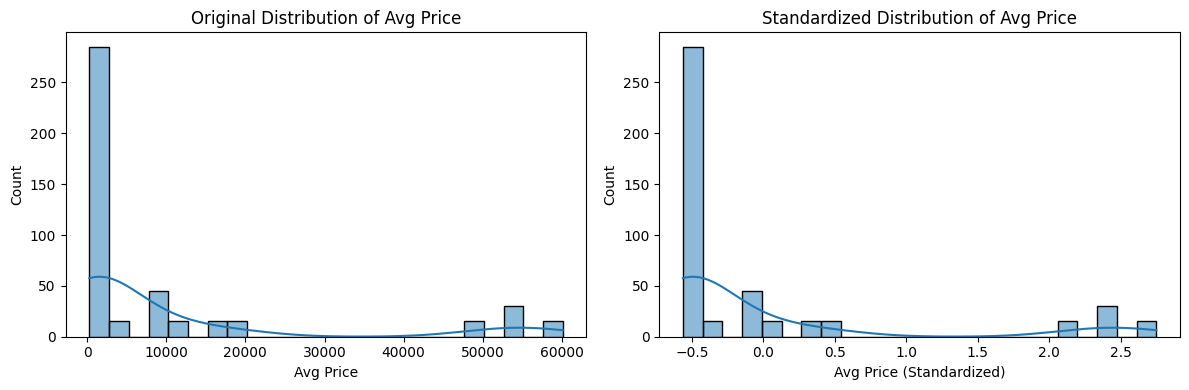

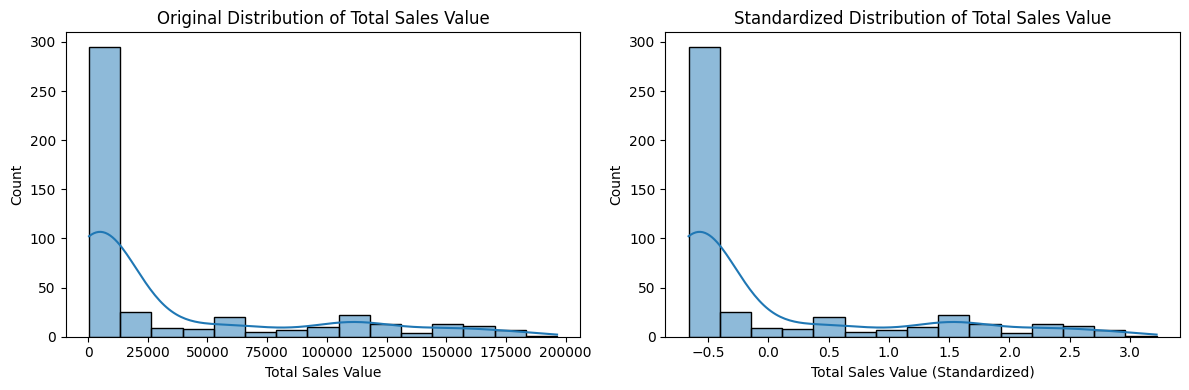

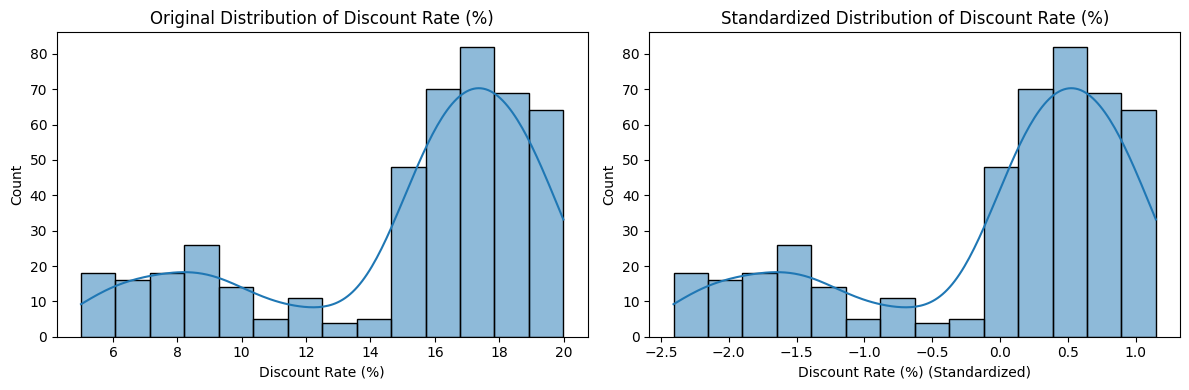

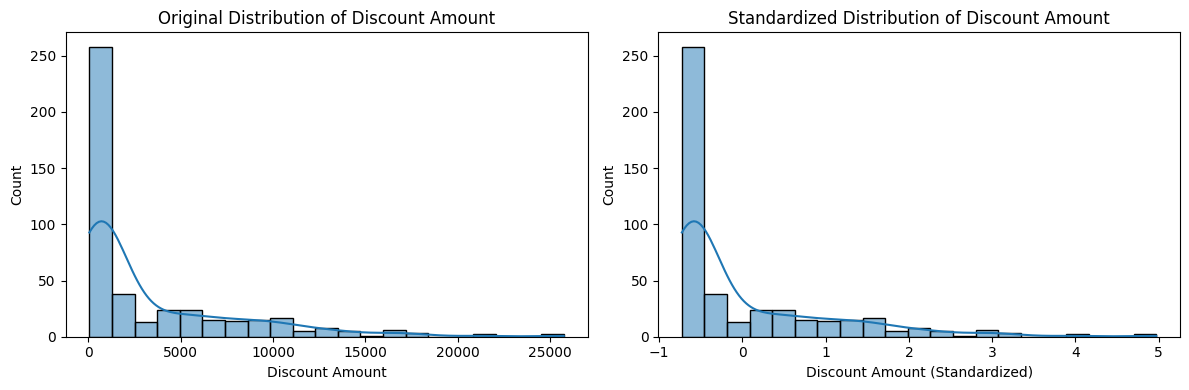

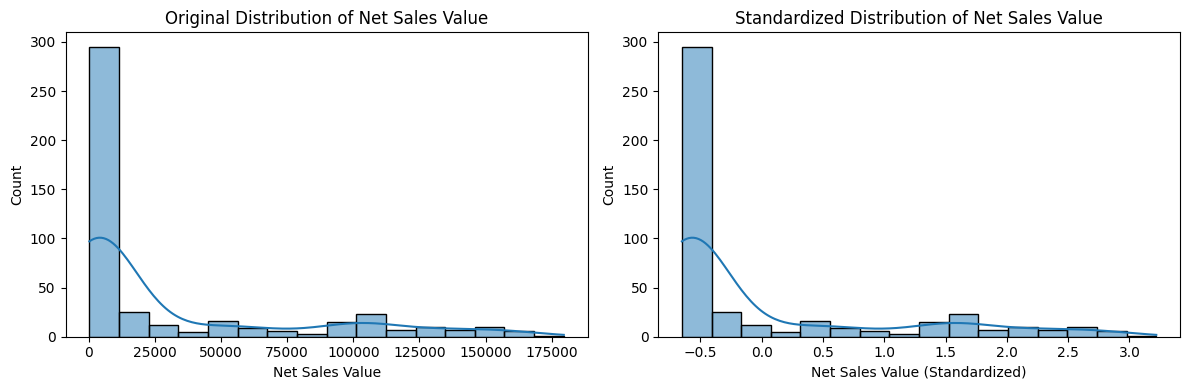

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(12,4))

    # Original distribution
    plt.subplot(1,2,1)
    sns.histplot(original_num[col], kde=True)
    plt.title(f"Original Distribution of {col}")
    plt.xlabel(col)

    # Standardized distribution
    plt.subplot(1,2,2)
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f"Standardized Distribution of {col}")
    plt.xlabel(col + " (Standardized)")

    plt.tight_layout()
    plt.show()

## Conversion of Categorical Data into Dummy Variables

Categorical variables like Date, Day, SKU, City, BU, Brand, and Model are converted into dummy variables via one-hot encoding, creating a binary column for each unique category (e.g., Date_01-04-2021, Model_Vedic Oil), with 1 for presence and 0 for absence. This transformation expands the dataset into over 100 columns, increasing dimensionality but ensuring a machine readable format without imposing artificial order, suitable for analysis or modeling.

In [ ]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

print("Original Categorical Columns:", cat_cols)
print("\nTransformed Dataset Sample:")
print(df_encoded.head())

Original Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

Transformed Dataset Sample:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770     

* pd.get_dummies() converts categorical variables into dummy/indicator variables.

* drop_first=False keeps all categories or we can set it to True to drop one column and avoid multicollinearity.

* The new dataset will contain both original numerical variables and the new dummy columns for each categorical variable.

* After transformation, categorical attributes such as Product Category or Region will appear as multiple binary columns, making the dataset structured and ready for machine learning.

## Conclusion:

# 1.Key Findings:
Most sales are low volume and price, skewed by some large transactions. Discount rates show moderate variability with few outliers. Visualizations support these insights with clear identification of outliers and category concentration.

# 2.Importance of Preprocessing:
Standardization ensures fair treatment of numerical variables during modeling, while one-hot encoding properly handles categorical variables, avoiding false ordinality and enabling machine learning models to process data effectively.

